In [1]:
#Exploratory Data Analysis

In [2]:
#Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import os

In [3]:
#load data
file = 'encoded.csv'
books_df= pd.read_csv(file)

In [4]:
#view data types
print(books_df.dtypes)

title                  object
author                 object
desc                   object
genre                  object
rating                float64
Languages               int64
Culture                 int64
Mystery                 int64
Non-Fiction             int64
Animals                 int64
Travel                  int64
Religion                int64
Social Issues           int64
Young Adult             int64
Unknown                 int64
Politics                int64
Geography               int64
Science Fiction         int64
Lifestyle               int64
History                 int64
Hobbies                 int64
Fiction                 int64
Science                 int64
Action                  int64
Academia                int64
Historical Fiction      int64
Fantasy                 int64
Entertainment           int64
Romance                 int64
Mythology               int64
Technology              int64
Education               int64
Art                     int64
dtype: obj

In [5]:
#descriptive
print(books_df.describe())
print(books_df.value_counts())

             rating     Languages       Culture       Mystery   Non-Fiction  \
count  8.952100e+04  89521.000000  89521.000000  89521.000000  89521.000000   
mean  -5.333773e-16      0.023860      0.215659      0.065091      0.075211   
std    1.000006e+00      0.152615      0.411281      0.246688      0.263734   
min   -1.008401e+01      0.000000      0.000000      0.000000      0.000000   
25%   -5.448113e-01      0.000000      0.000000      0.000000      0.000000   
50%    5.138888e-02      0.000000      0.000000      0.000000      0.000000   
75%    6.216673e-01      0.000000      0.000000      0.000000      0.000000   
max    2.876859e+00      1.000000      1.000000      1.000000      1.000000   

            Animals        Travel      Religion  Social Issues   Young Adult  \
count  89521.000000  89521.000000  89521.000000   89521.000000  89521.000000   
mean       0.013516      0.084282      0.049363       0.017627      0.021559   
std        0.115472      0.277812      0.216625 

In [6]:
# Plot the distribution of genres
genre_columns = [
    'Languages', 'Culture', 'Mystery', 'Non-Fiction', 'Animals', 'Travel',
    'Religion', 'Social Issues', 'Young Adult', 'Unknown', 'Politics',
    'Geography', 'Science Fiction', 'Lifestyle', 'History', 'Hobbies',
    'Fiction', 'Science', 'Action', 'Academia', 'Historical Fiction',
    'Fantasy', 'Entertainment', 'Romance', 'Mythology', 'Technology',
    'Education', 'Art'
]

genre_counts = books_df[genre_columns].sum()
genre_counts = genre_counts.sort_values(ascending=False)

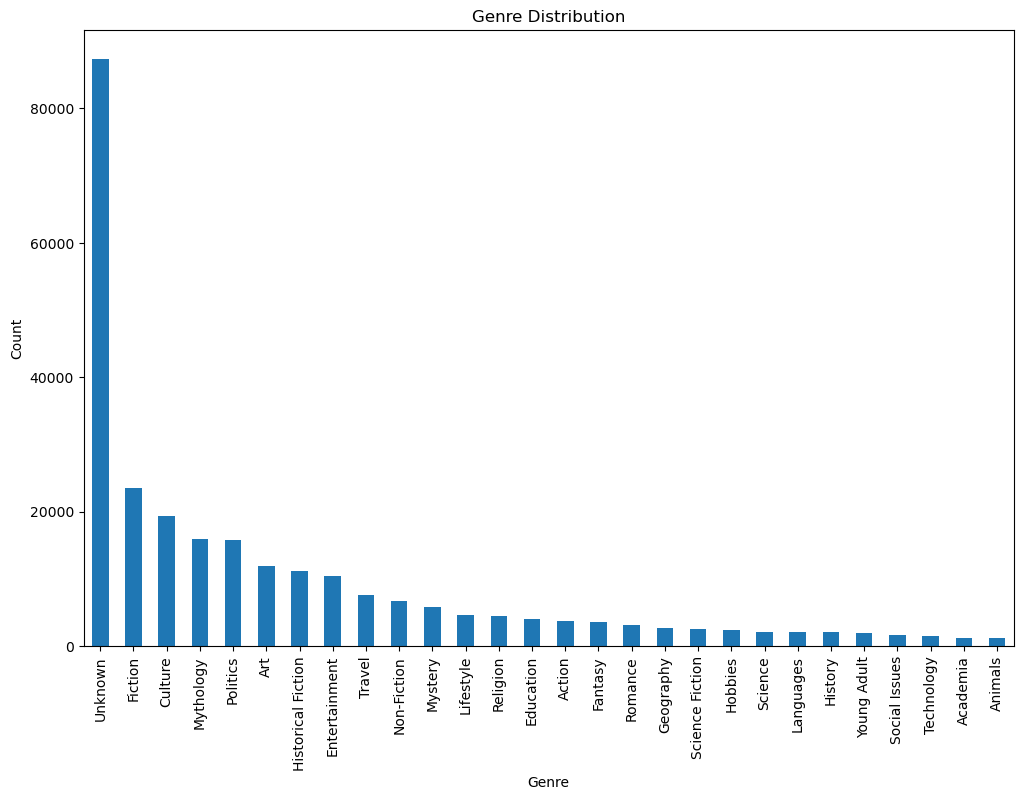

In [7]:
# Plot the genre distribution
plt.figure(figsize=(12, 8))
genre_counts.plot(kind='bar')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

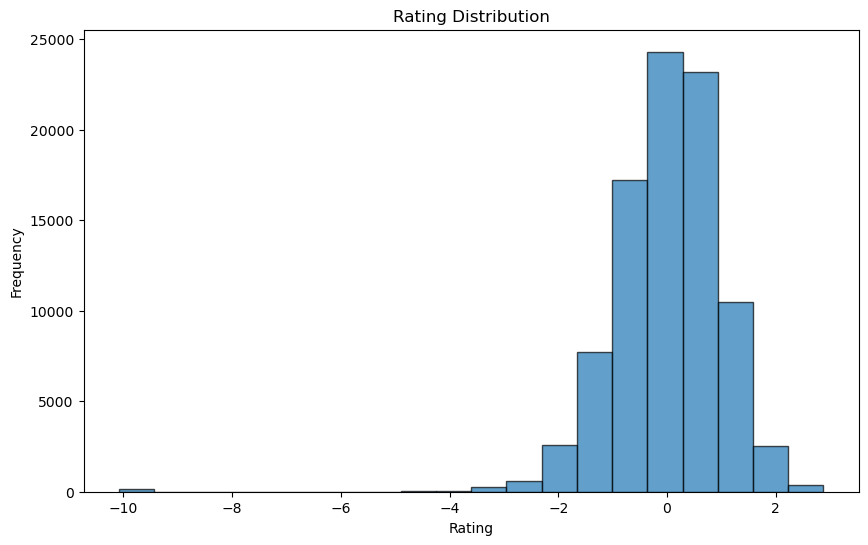

In [8]:
# Plot the distribution of ratings
plt.figure(figsize=(10, 6))
plt.hist(books_df['rating'].dropna(), bins=20, edgecolor='k', alpha=0.7)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [9]:
print(books_df['rating'].describe())

count    8.952100e+04
mean    -5.333773e-16
std      1.000006e+00
min     -1.008401e+01
25%     -5.448113e-01
50%      5.138888e-02
75%      6.216673e-01
max      2.876859e+00
Name: rating, dtype: float64


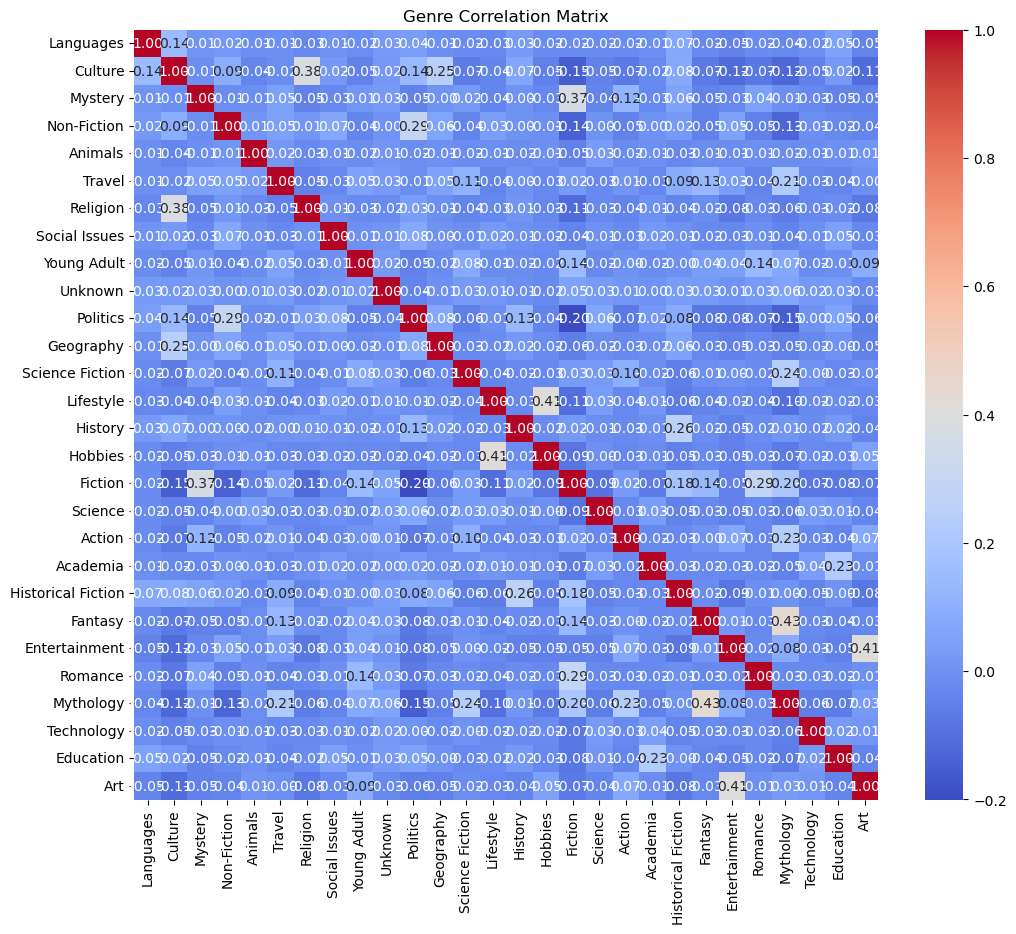

In [10]:
# Compute correlation matrix
correlation_matrix = books_df[genre_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Genre Correlation Matrix')
plt.show()

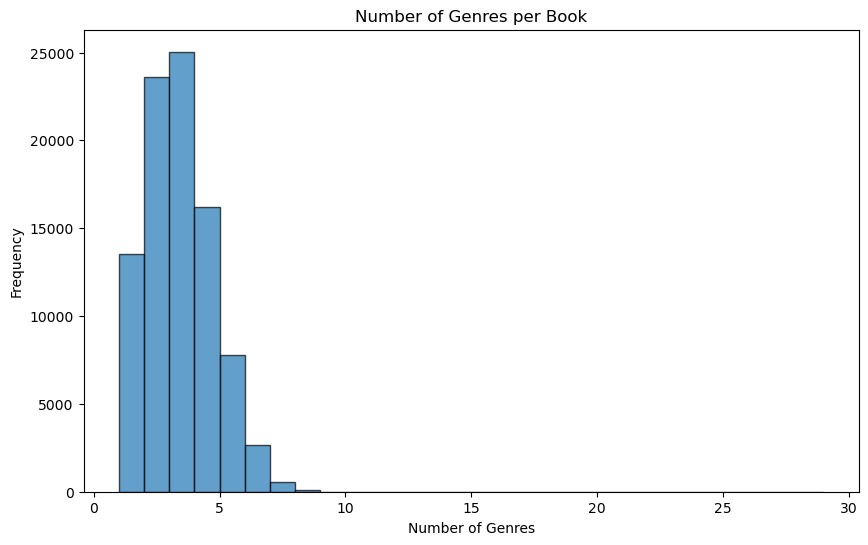

In [11]:
# Count number of genres per book
books_df['num_genres'] = books_df[genre_columns].sum(axis=1)

# Plot distribution of number of genres per book
plt.figure(figsize=(10, 6))
plt.hist(books_df['num_genres'], bins=range(1, len(genre_columns)+2), edgecolor='k', alpha=0.7)
plt.title('Number of Genres per Book')
plt.xlabel('Number of Genres')
plt.ylabel('Frequency')
plt.show()